# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Convert units to metric
units = "metric"

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
(f"Number of cities in the list: {len(cities)}")

'Number of cities in the list: 585'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "APPID=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | daoukro
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | povoa de lanhoso
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | colonia
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | palamos
Processing Record 16 of Set 1 | faya-largeau
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | ust'-talovka
Processing Record 19 of Set 1 | ambanja
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | callao
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.24,62,5,13.18,SH,1682173885
1,college,64.8569,-147.8028,-0.79,72,75,8.23,US,1682173886
2,daoukro,7.0591,-3.9631,37.34,33,93,1.48,CI,1682173886
3,punta arenas,-53.1500,-70.9167,8.06,61,0,7.72,CL,1682173838
4,hawaiian paradise park,19.5933,-154.9731,21.69,93,20,0.00,US,1682173886


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.24,62,5,13.18,SH,1682173885
1,college,64.8569,-147.8028,-0.79,72,75,8.23,US,1682173886
2,daoukro,7.0591,-3.9631,37.34,33,93,1.48,CI,1682173886
3,punta arenas,-53.1500,-70.9167,8.06,61,0,7.72,CL,1682173838
4,hawaiian paradise park,19.5933,-154.9731,21.69,93,20,0.00,US,1682173886


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

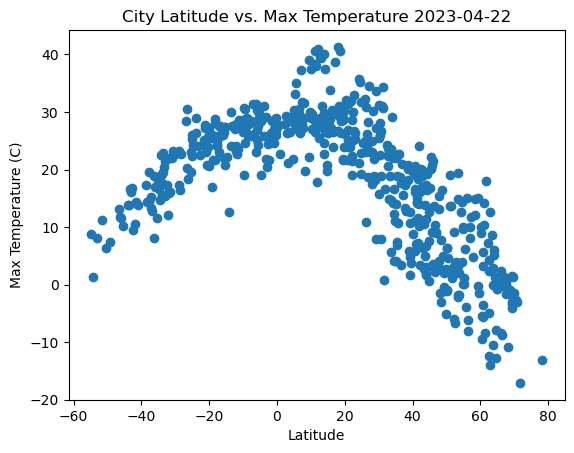

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y)

plot_date = date.today()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature {plot_date}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

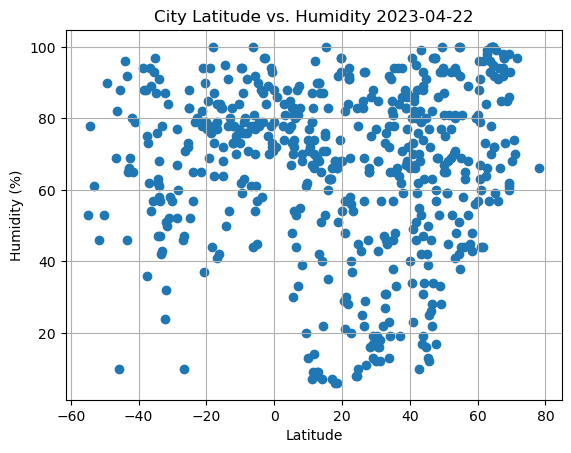

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {plot_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

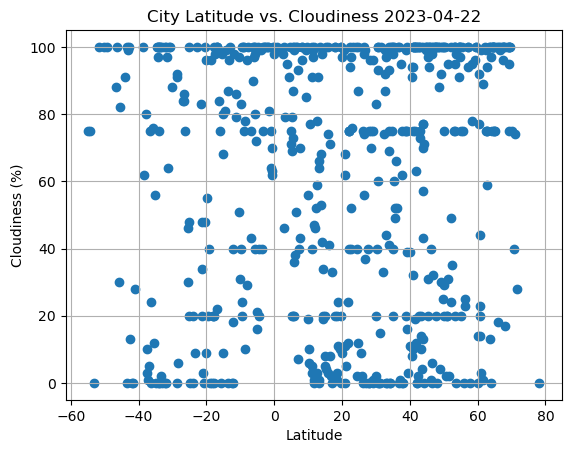

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {plot_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

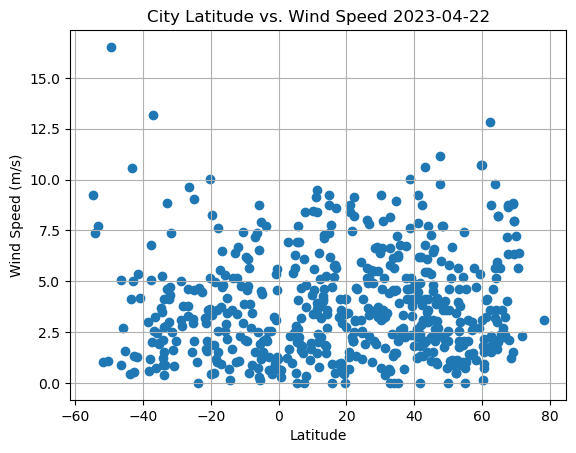

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {plot_date}")
#plt.marker(markeredgecolor="black")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is 0.05592513782532985


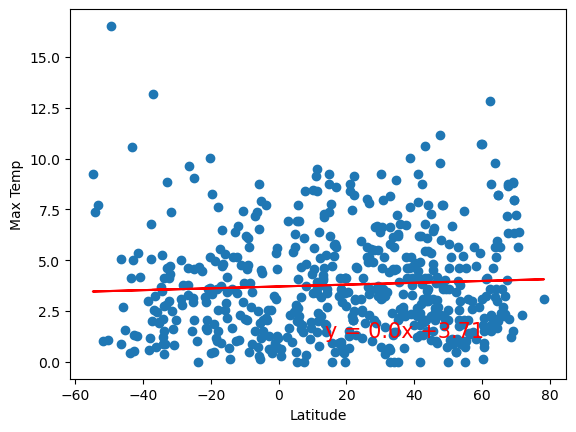

In [12]:
# Define a function to create Linear Regression plots

def regress_plot(x, y, a, b):
    x = x
    y = y
    a = a
    b = b

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    print(f"The r-value is {rvalue}")
    plt.scatter(x,y)
    plt.xlabel(a)
    plt.ylabel(b)
    # Get regression values
    regress_values = x * slope + intercept

    # Slope equation and positioning on plot
    std_x = x.std()
    std_y = y.std()
    if rvalue >= 0:
        eq_x = x.mean()-5
        eq_y = y.mean()-std_y
    else:
        eq_x = x.mean()-5
        eq_y = y.mean()+std_y
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(eq_x,eq_y),fontsize=15,color="red")

    plt.plot(x,regress_values,"r-")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,-0.79,72,75,8.23,US,1682173886
2,daoukro,7.0591,-3.9631,37.34,33,93,1.48,CI,1682173886
4,hawaiian paradise park,19.5933,-154.9731,21.69,93,20,0.00,US,1682173886
5,keflavik,64.0049,-22.5624,5.95,100,100,3.60,IS,1682173886
6,povoa de lanhoso,41.5787,-8.2820,18.41,67,19,4.93,PT,1682173886


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.24,62,5,13.18,SH,1682173885
3,punta arenas,-53.1500,-70.9167,8.06,61,0,7.72,CL,1682173838
7,puerto natales,-51.7236,-72.4875,11.25,46,100,1.03,CL,1682173886
10,port-aux-francais,-49.3500,70.2167,7.46,90,100,16.52,TF,1682173887
12,waitangi,-43.9535,-176.5597,13.79,96,91,0.45,NZ,1682173887


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8520786468577177


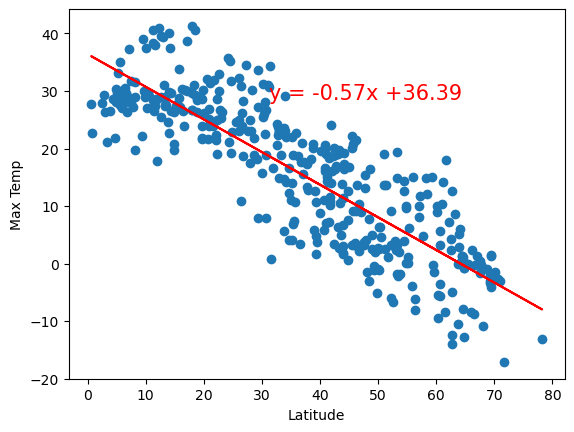

In [15]:
# Linear regression on Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is 0.8220365463864626


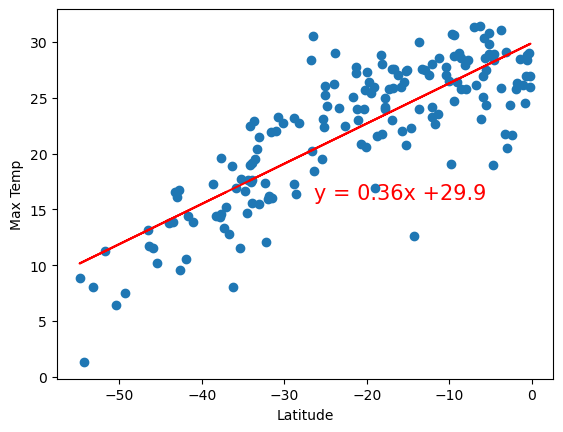

In [16]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.19908490343237775


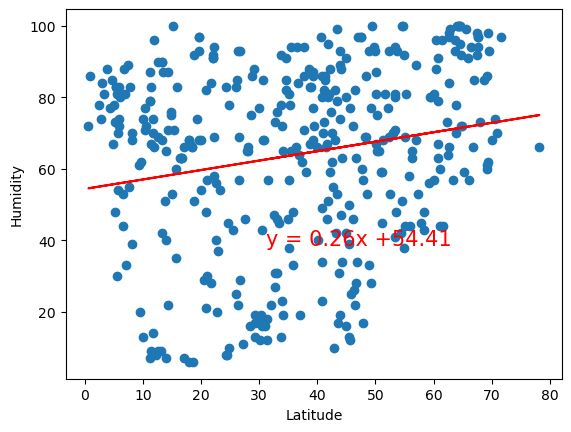

In [17]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is 0.24886688653002986


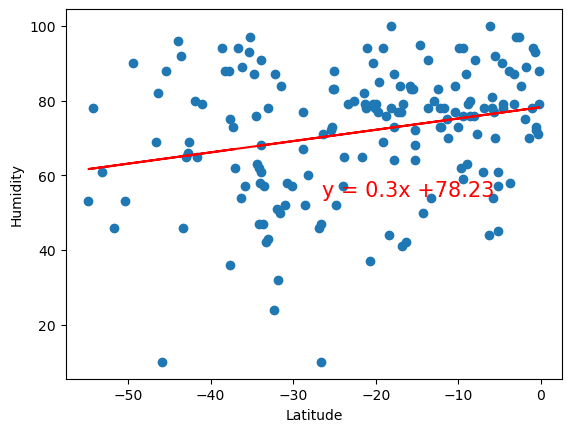

In [18]:
# Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.13899794613724042


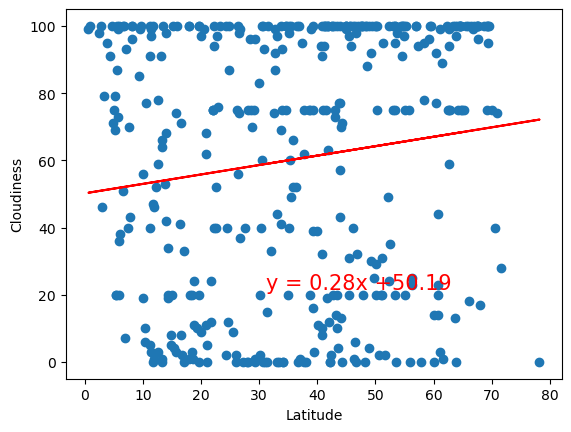

In [19]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is 0.1357311700440339


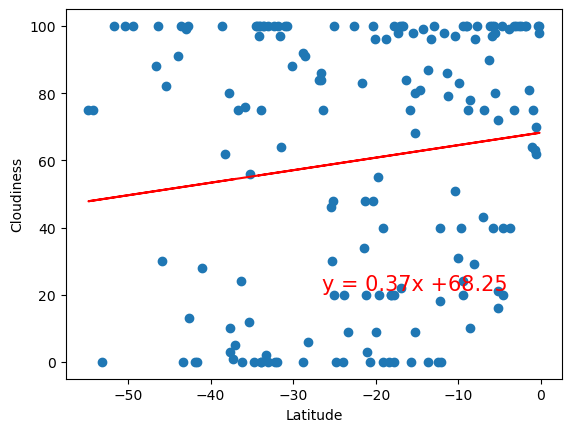

In [20]:
# Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.04937059312035193


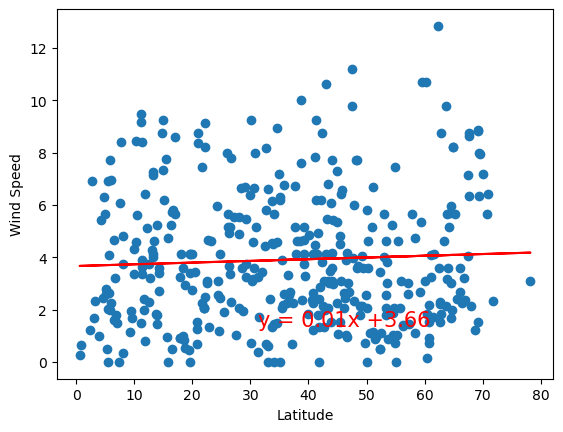

In [21]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is 0.04937059312035193


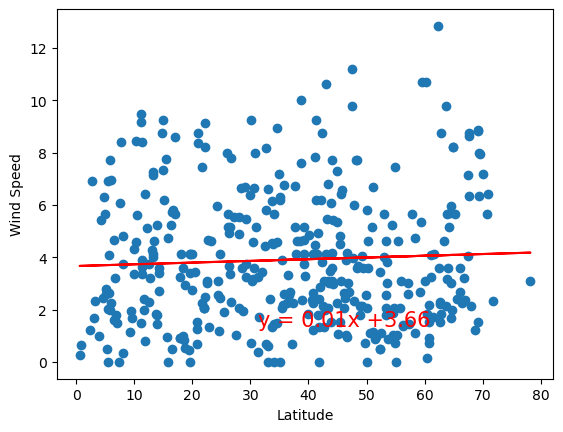

In [22]:
# Southern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE